# Continuous Parametric Probability Distributions

In [83]:
import scipy.stats as stats # This is the statistics package
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1) # set a standard seed so that we can all see the same distributions

## 1.) Gaussian PDFs (Normal)

In [84]:
sample_size = 10
mean = 0
std = 2

data = stats.norm.rvs(loc=mean, scale=std, size=sample_size)
data_df = pd.DataFrame(data)

### Getting the Kernel Density Estimation (KDE)

Once the data is in a Pandas DataFrame we can calculate the KDE.  This is our estimate of the PDF from the samples we pulled from the Uniform PDF.  We can also plot the PDF on top of it for a comparison.

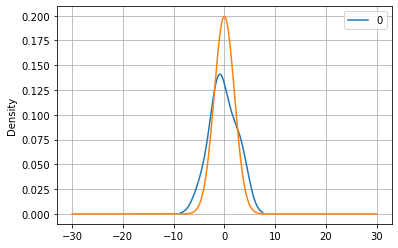

In [85]:
x = np.arange(-30,30.1,.1)
true_pdf = stats.norm.pdf(x=x, loc=mean, scale=std)

data_df.plot(kind='density', grid=True)
plt.plot(x, true_pdf)
plt.legend()

### Cumulative Density Function (CDF)

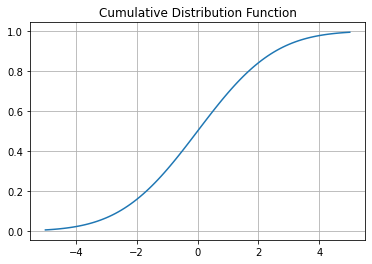

In [86]:
# This will give the output of 0.5 which means that in this particular uniform distribution, if we pick out an observation, there is a 50% chance that it would be between 0 and 5.
single_prob = stats.norm.cdf(x=5, loc=mean, scale=std)

probs = stats.norm.cdf(x=np.arange(-5,5.1,.1), loc=mean, scale=std)

plt.title("Cumulative Distribution Function")
plt.plot(np.arange(-5,5.1,.1), probs)
plt.grid()
plt.show()

### Percent Point Function (PPF)

In [87]:
# The inverse of cdf is ppf. Given the probability, ppf gives the cutoff on the x axis. 
# For example, to get the cutoff value for which we have 30% chance of drawing an observation below that value
ppf_vals = stats.uniform.ppf(q=0.3, 
                             loc=mean, 
                             scale=std)
print(ppf_vals)

0.6


## Multivariate Gaussian Distribution

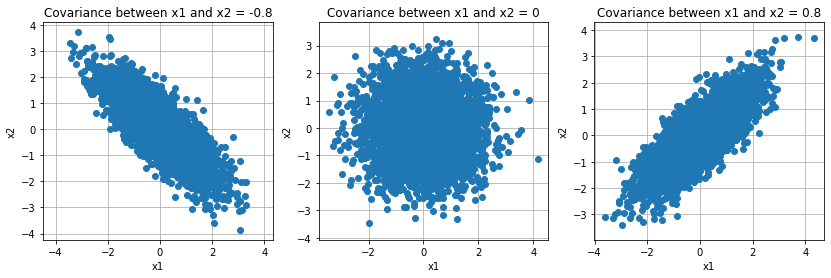

In [88]:
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distribution to
# be at (0,0)
mean = np.array([0,0])
 
# Iterating over different covariance
# values
plt.figure(figsize=(14,4))
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = stats.multivariate_normal(cov = cov, mean = mean)
     
    # Generating 5000 samples out of the
    # distribution
    data = distr.rvs(size = 5000)
     
    # Plotting the generated samples
    plt.plot(data[:,0],data[:,1], 'o')
    plt.title(f'Covariance between x1 and x2 = {val}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis('equal')
    plt.grid() 
plt.show()

## 2.) Uniform PDF

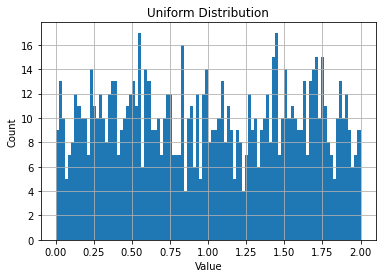

In [114]:
uniform_data = stats.uniform.rvs(size=1000, loc=0, scale=2)

plt.title("Uniform Distribution")
plt.hist(uniform_data, 100)
plt.grid()
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

## 3.) Student-T's PDF

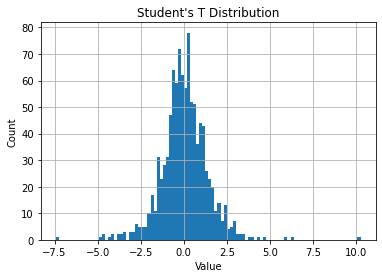

In [104]:
degrees_of_freedom = 4
t_dist = stats.t.rvs(degrees_of_freedom, size=1000)
# The t distribution is a symmetrical distribution (very similar to Gaussian), but with more probablity assigned to the tails

# For example:
plt.title("Student's T Distribution")
plt.hist(t_dist, 100)
plt.grid()
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

## 4.) Chi-Squared PDF

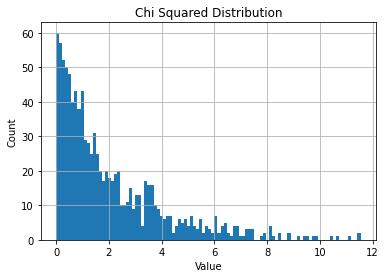

In [109]:
degrees_of_freedom = 2
df = stats.chi2.rvs(degrees_of_freedom, size=1000)
chi2_dist = pd.DataFrame(df)

plt.title("Chi Squared Distribution")
plt.hist(chi2_dist, 100)
plt.grid()
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

## 5.) Gamma PDF

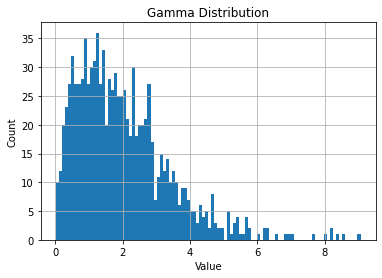

In [112]:
degrees_of_freedom = 2
df = stats.gamma.rvs(degrees_of_freedom, size=1000)
gamma_dist = pd.DataFrame(df)

plt.title("Gamma Distribution")
plt.hist(gamma_dist, 100)
#plt.yscale('log')
plt.grid()
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

## 6.) Extreme Value Distributions

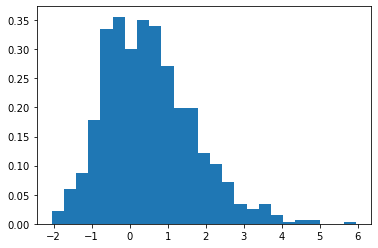

In [107]:
c = 0.1 #(k)
r = stats.genextreme.rvs(c, loc=0, scale=1, size=1000)

plt.hist(r, density=True, bins='auto')
plt.show()

## 7.) Beta Distribution

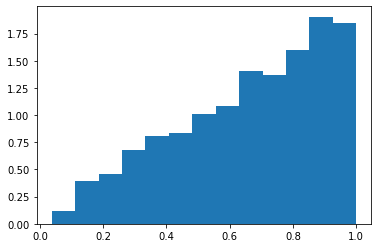

In [108]:
r = stats.beta.rvs(a=2, b=1, size=1000) # a, b are also the parameters p and q

plt.hist(r, density=True, bins='auto')
plt.show()